In [1]:
#Importamos las librerias para graficar
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def mostrar_grafica():
    try:
        #Pedimos los datos de la grafica
        vertices = int(input("Ingresa el número de vertices de tu gráfica"))
        aristas = int(input("Ingres el número de aristas que tiene la gráfica"))

        #Lista que va a contener las aristas con sus respectivos pesos
        aristas_pesos = []
        #Lista que va a contener los vertices
        vertices_lista = [i + 1 for i in range(vertices)]

        # Ciclo para ir ingresando las aristas a la lista de arriba
        for i in range(aristas):
            extremo1 = int(input("Ingresa un extremo de la arista"))
            extremo2 = int(input("Ingresa el otro extremo de la artisa"))
            peso = int(input("Ingresa el peso de la arista"))

            aristas_pesos.append((extremo1, extremo2, peso))
        
        #Mostramos la grafica
        G = nx.Graph()
        G.add_nodes_from(vertices_lista)
        G.add_weighted_edges_from(aristas_pesos)

        labels = nx.get_edge_attributes(G,'weight')
        pos = nx.spring_layout(G, k=10)

        plt.figure(1)
        nx.draw(G, pos, with_labels=True, node_color="#E38585", node_size=1000, width=3, edge_color = "#80B9DF")
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        plt.title("Gráfica original")

        #Regresamos los datos de la grafica
        return aristas_pesos, vertices_lista


    except ValueError:
        print("Lo siento, el dato ingresado no es un número entero positivo")



In [7]:
def Prim():
    #Recuperamos las listas de aristas y verices
    aristas, vertices = mostrar_grafica()
    
    n = len(vertices)
    k = 0
    X_0 = [1]
    A_0 = []

    #Eliminamos el primer vertice para que no se pueda
    #volver a escoger
    vertices.remove(1)

    #Ciclo para garantizar que haya n-1 aristas en el arbol
    while k < n-1:
        k += 1

        #Lista que va a guardar las aristas con un 
        #extremo en X_{0}
        aristas_k = []
        pesos = []

        #Buscamos las aristas con solo un extremo en X_{0}
        for arista in aristas:
            #Nos saltamos el caso cuando los dos extremos
            #estan en X_0
            if arista[0] in X_0 and arista[1] in X_0:
                continue

            #Añadimos el peso de la arista con un extremo en X_{0}
            pesos.append(arista[2])
            #Añadimos la arista con extremo en X_{0} a su lista
            aristas_k.append(arista)

        #Buscamos el peso minimo y su indice en la lista
        peso_min = min(pesos)
        indice = pesos.index(peso_min) 

        #identificamos el extremo de la arista que no está en X_{0}
        if aristas_k[indice][0] in X_0:
            x_k = aristas_k[indice][1]
        else:
            x_k = aristas_k[indice][0]

        #Añadimos la arista de peso minimo
        X_0.append(x_k)
        #Añadimos el vertice que no estaba en la lista
        A_0.append(aristas_k[indice])
        
        #Eliminamos los elementos ya seleccionarlos
        #para de esta manera no repetirlos
        aristas.remove(aristas_k[indice])

    #Graficamos el arbol de peso minimo
    H = nx.Graph()
    H.add_nodes_from(X_0)
    H.add_weighted_edges_from(A_0)

    labels = nx.get_edge_attributes(H,'weight')
    pos = nx.spring_layout(H, k=10)

    plt.figure(2)
    nx.draw(H, pos, with_labels=True, node_color="#E38585", node_size=1000, width=3, edge_color = "#80B9DF")
    nx.draw_networkx_edge_labels(H,pos,edge_labels=labels)
    plt.title("Árbol de peso mínimo")

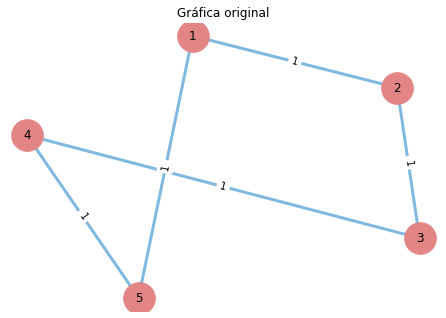

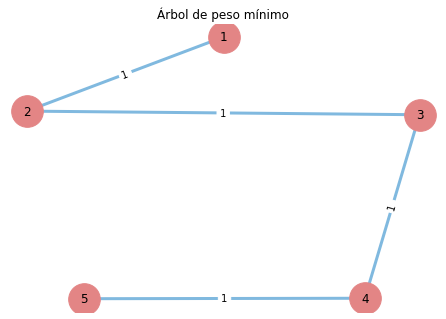

In [8]:
Prim()